In [105]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
train = pd.read_csv('/content/drive/MyDrive/Pattern Lab/train_knn.txt', sep=',', header=None)
test = pd.read_csv('/content/drive/MyDrive/Pattern Lab/test_knn.txt', sep=',', header=None)

In [108]:
class_1 = train[train[2]==1]
class_1

,0,1,2
0,7,7,1
1,7,4,1
2,6,4,1
3,7,5,1
4,7,6,1
5,6,7,1
6,6,6,1


In [109]:
class_0 = train[train[2]==2]
class_0

,0,1,2
7,3,4,2
8,2,3,2
9,3,2,2
10,4,3,2
11,3,3,2
12,4,4,2
13,1,4,2


# Plotting Graph

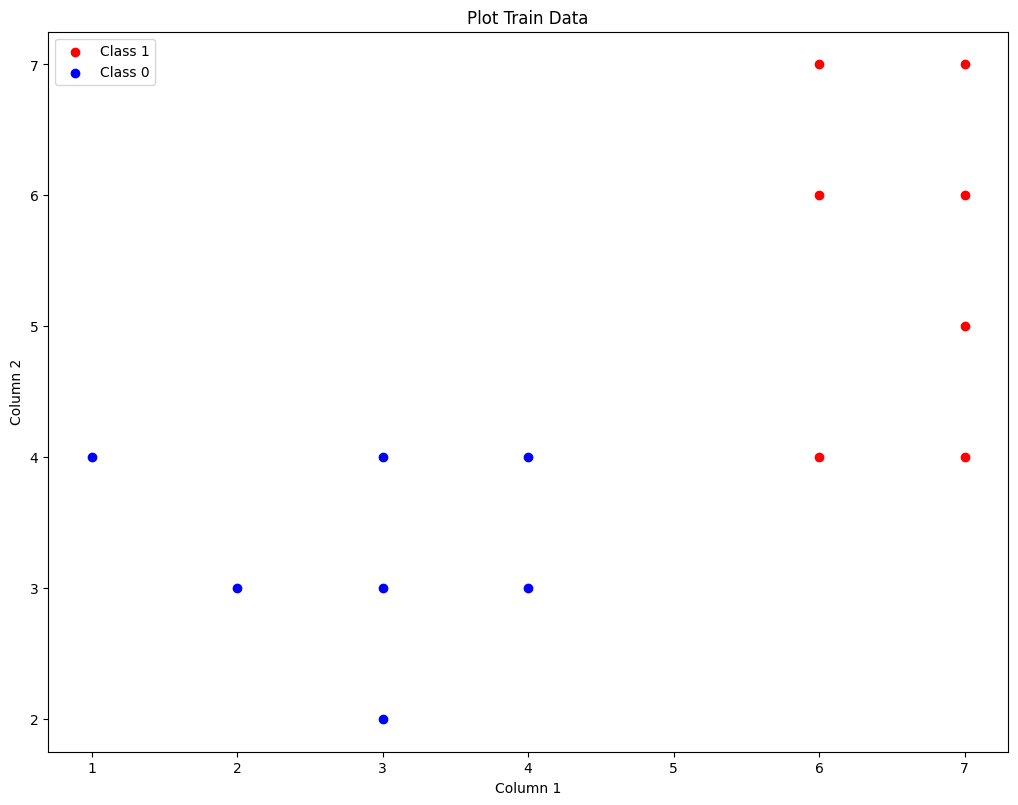

In [110]:
fig=plt.figure()
ax=fig.add_axes([0,0,1.5,1.5])
ax.scatter(class_1[0], class_1[1], color='red', label="Class 1")
ax.scatter(class_0[0], class_0[1] , color='blue', label="Class 0")
ax.set_xlabel('Column 1')
ax.set_ylabel('Column 2')
ax.set_title('Plot Train Data')
plt.legend(loc="upper left")
plt.show()

# Defining Functions

In [111]:
def bubbleSort(array, target_label):
    for i in range(len(array)):
        for j in range(0, len(array) - i - 1):
            if array[j] > array[j + 1]:
                temp = array[j]
                array[j] = array[j+1]
                array[j+1] = temp

                temp = target_label[j]
                target_label[j] = target_label[j+1]
                target_label[j+1] = temp
    return array

In [112]:
def calculate_dist(x,y):
    global train
    dist = []
    target_label = list(train[2])
    for i,j in zip(train[0], train[1]):
        dist.append(((i-x)**2 +(j-y)**2))
    dist = bubbleSort(dist,target_label)
    return dist,target_label

In [113]:
distances = []
target_labels = []
for i,j in zip(test[0], test[1]):
    a, b = calculate_dist(i,j)
    distances.append(a)
    target_labels.append(b)

In [114]:
distances = np.array(distances)
distances.shape

(9, 14)

In [115]:
target_labels = np.array(target_labels)
target_labels.shape

(9, 14)

In [116]:
test = np.array(test)

# KNN Algorithm

In [117]:
k = 5
output = []
predicted_class_1 = []
predicted_class_0 = []
prediction_text = []
for i in range(len(test)):
    count_1, count_2 = 0, 0
    print('Test Point: ', test[i])
    s = 'Test Point: '+ str(test[i]) + '\n'
    prediction_text.append(s)
    l=1;
    for j in range(k):
        print('Distance ', l, ': ', distances[i][j], '  Class : ', target_labels[i][j])
        s = 'Distance ' + str(l) + ': '+ str(distances[i][j]) + '  Class : ' + str(target_labels[i][j]) + '\n'
        prediction_text.append(s)
        if target_labels[i][j] == 1:
            count_1 += 1
        else:
            count_2 += 1
    if count_1 > count_2:
        print('Predicted Class: 1')
        prediction_text.append('Predicted Class: 1' + '\n\n')
        predicted_class_1.append(list(test[i]))
    else:
        print('Predicted Class: 0')
        prediction_text.append('Predicted Class: 0' + '\n\n')
        predicted_class_0.append(list(test[i]))
        l=l+1;
    print('\n\n')

Test Point:  [3 7]
Distance  1 :  9   Class :  1
Distance  1 :  9   Class :  2
Distance  1 :  10   Class :  1
Distance  1 :  10   Class :  2
Distance  1 :  13   Class :  2
Predicted Class: 0



Test Point:  [7 7]
Distance  1 :  0   Class :  1
Distance  1 :  1   Class :  1
Distance  1 :  1   Class :  1
Distance  1 :  2   Class :  1
Distance  1 :  4   Class :  1
Predicted Class: 1



Test Point:  [4 3]
Distance  1 :  0   Class :  2
Distance  1 :  1   Class :  2
Distance  1 :  1   Class :  2
Distance  1 :  2   Class :  2
Distance  1 :  2   Class :  2
Predicted Class: 0



Test Point:  [2 8]
Distance  1 :  17   Class :  1
Distance  1 :  17   Class :  2
Distance  1 :  17   Class :  2
Distance  1 :  20   Class :  1
Distance  1 :  20   Class :  2
Predicted Class: 0



Test Point:  [3 5]
Distance  1 :  1   Class :  2
Distance  1 :  2   Class :  2
Distance  1 :  4   Class :  2
Distance  1 :  5   Class :  2
Distance  1 :  5   Class :  2
Predicted Class: 0



Test Point:  [1 2]
Distance  1 :  2  

In [118]:
with open('prediction.txt', 'w') as writefile:
    for line in prediction_text:
        writefile.write(line)

In [119]:
df1 = pd.DataFrame(predicted_class_1, columns = [0,1])
df2 = pd.DataFrame(predicted_class_0, columns = [0,1])

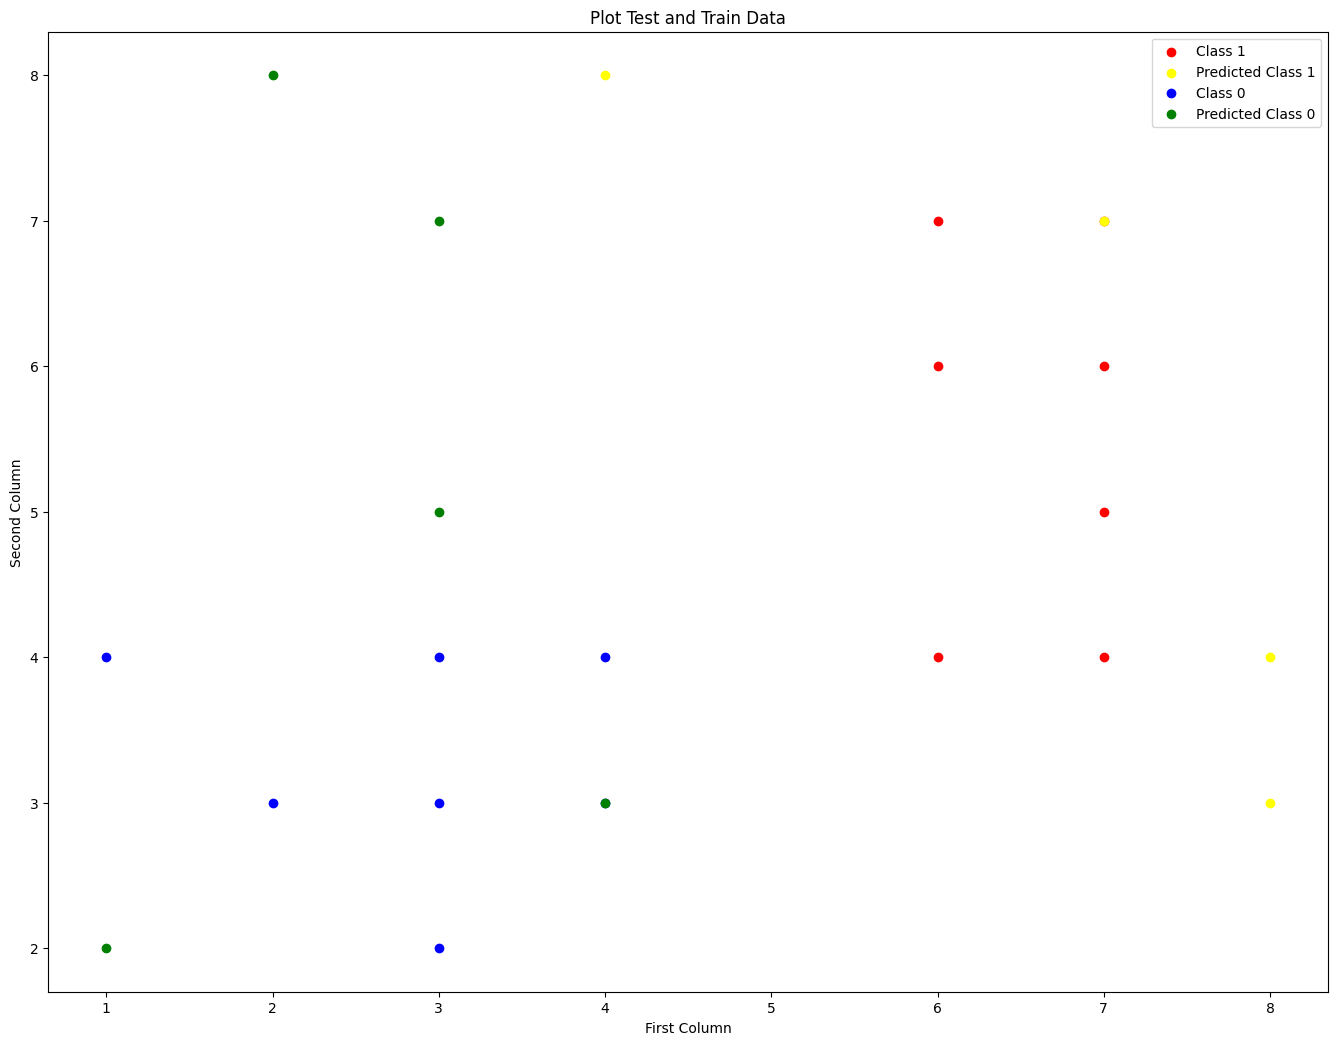

In [120]:
fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
ax.scatter(class_1[0], class_1[1], color='red', label="Class 1")
ax.scatter(df1[0], df1[1], color='yellow', label="Predicted Class 1")

ax.scatter(class_0[0], class_0[1] , color='blue', label="Class 0")
ax.scatter(df2[0], df2[1] , color='green', label="Predicted Class 0")
ax.set_xlabel('First Column')
ax.set_ylabel('Second Column')
ax.set_title('Plot Test and Train Data')
plt.legend(loc="upper right")
plt.show()